#  Sales Analysis with Matplotlib & Seaborn

In [15]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Create Demo Sales Data

np.random.seed(10)
n = 200

data = pd.DataFrame({
    "OrderID": range(1, n+1),
    "Product": np.random.choice(["Laptop", "T-Shirt", "Rice Bag", "Novel"], size=n),
    "Region": np.random.choice(["North", "South", "East", "West"], size=n),
    "Price": np.round(np.random.normal(loc=500, scale=150, size=n), 2),  # average price ~ 500
    "Quantity": np.random.randint(1, 6, size=n),  # 1–5 items per order
    "Discount": np.random.choice([0, 5, 10], size=n),
    "Date": pd.to_datetime(np.random.choice(pd.date_range("2023-01-01", "2023-12-31"), size=n))
})

# Calculate revenue
data["Revenue"] = data["Price"] * data["Quantity"] * (1 - data["Discount"]/100)

# Introduce some missing values
data.loc[data.sample(frac=0.05).index, "Price"] = np.nan

# -----------------------------
# Step 2: Clean the Data
# -----------------------------
print("Missing values before cleaning:\n", data.isnull().sum())

data["Price"] = data["Price"].fillna(data["Price"].median())

print("\nMissing values after cleaning:\n", data.isnull().sum())

data["Month"] = data["Date"].dt.month_name()




Missing values before cleaning:
 OrderID      0
Product      0
Region       0
Price       10
Quantity     0
Discount     0
Date         0
Revenue      0
dtype: int64

Missing values after cleaning:
 OrderID     0
Product     0
Region      0
Price       0
Quantity    0
Discount    0
Date        0
Revenue     0
dtype: int64


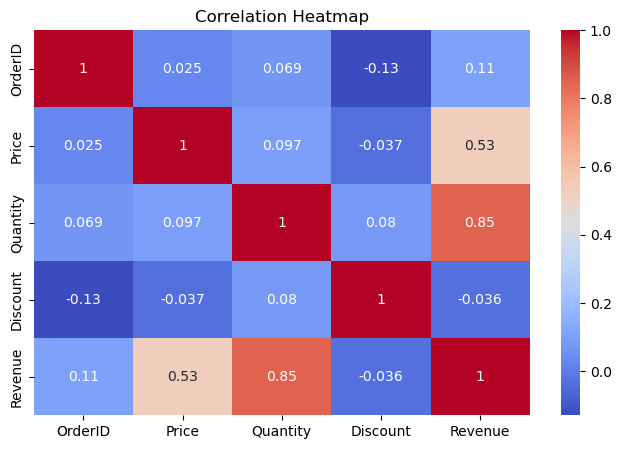

In [16]:
# 1. Heatmap of correlations
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



/var/folders/5r/487gm6s910s1ttph9006nmvw0000gn/T/ipykernel_66130/128001999.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Product", y="Revenue", data=data, palette="Set2")


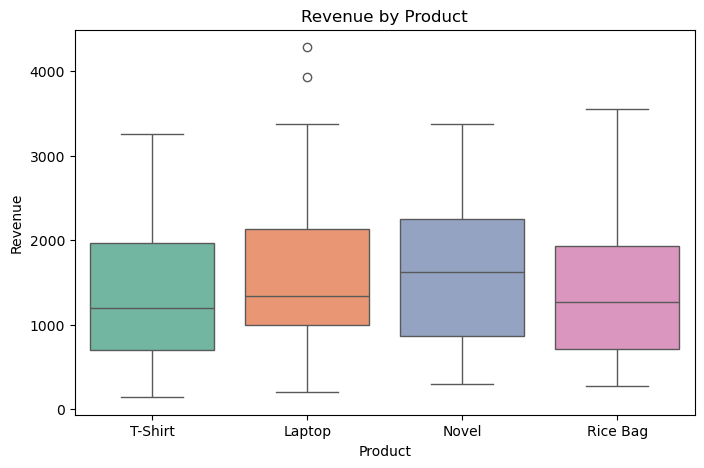

In [17]:
# 2. Boxplot (Revenue by Product)
plt.figure(figsize=(8,5))
sns.boxplot(x="Product", y="Revenue", data=data, palette="Set2")
plt.title("Revenue by Product")
plt.show()



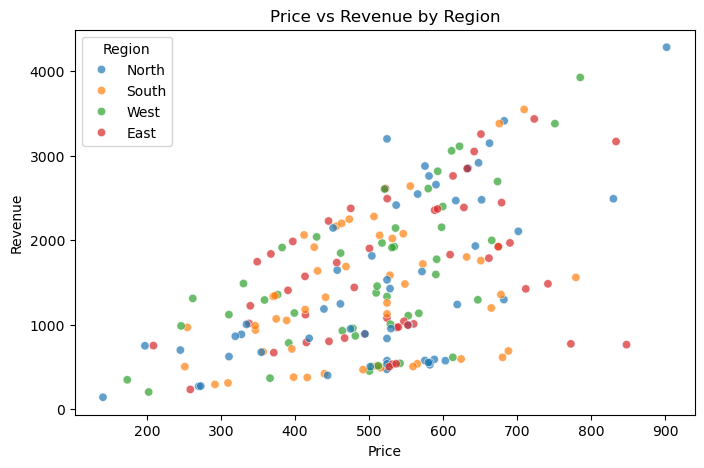

In [18]:
# 3. Scatterplot - Price vs Revenue (colored by Region)
plt.figure(figsize=(8,5))
sns.scatterplot(x="Price", y="Revenue", hue="Region", data=data, alpha=0.7)
plt.title("Price vs Revenue by Region")
plt.show()



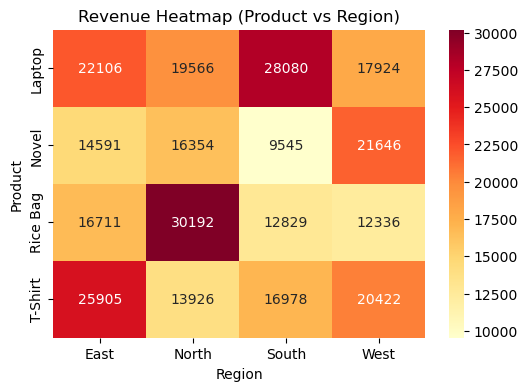

In [19]:
# 4. Heatmap - Revenue by Product & Region
pivot = data.pivot_table(values="Revenue", index="Product", columns="Region", aggfunc="sum")
plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Revenue Heatmap (Product vs Region)")
plt.show()



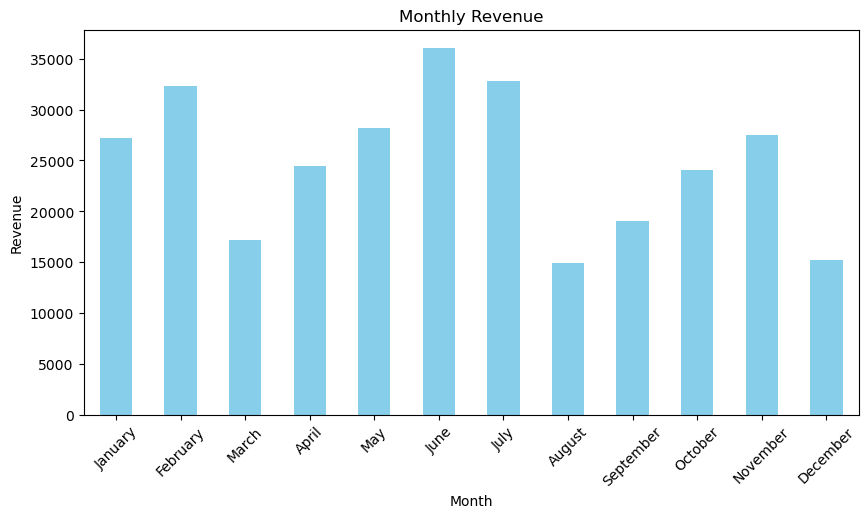

In [20]:
# 5. Monthly Revenue Trend
monthly = data.groupby("Month")["Revenue"].sum().reindex(
    ["January","February","March","April","May","June",
     "July","August","September","October","November","December"]
)
plt.figure(figsize=(10,5))
monthly.plot(kind="bar", color="skyblue")
plt.title("Monthly Revenue")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()